<a href="https://colab.research.google.com/github/HPAndres/UDA_DeepLearning/blob/main/Gradient_Descentcopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementing Gradient Descent**



http://www.ats.ucla.edu/stat/data/binary.csv(opens in a new tab))

https://learn.udacity.com/nanodegrees/nd101/parts/cd1818/lessons/cbfeaeb0-617a-442f-889a-ccb74dfa6f62/concepts/1421ddc3-a173-49b8-9cd8-b6e34d8994f8?_gl=1*jsn2e0*_gcl_au*ODk1OTk1MDg0LjE3MzQ1NDI2NTk.*_ga*MTIxMjYxMDM1Ny4xNzI2MTgyMzU5*_ga_CF22GKVCFK*MTc0MTc1MzM3Ni4xMy4xLjE3NDE3NTM0NTIuNjAuMC4w&lesson_tab=lesson

In [ ]:
import numpy as np

In [ ]:
# prompt: read a csv file called binary.csv

import pandas as pd

# Assuming the CSV file is in the current working directory
df = pd.read_csv('binary.csv')

# Print the first few rows of the DataFrame
print(df.head())


   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


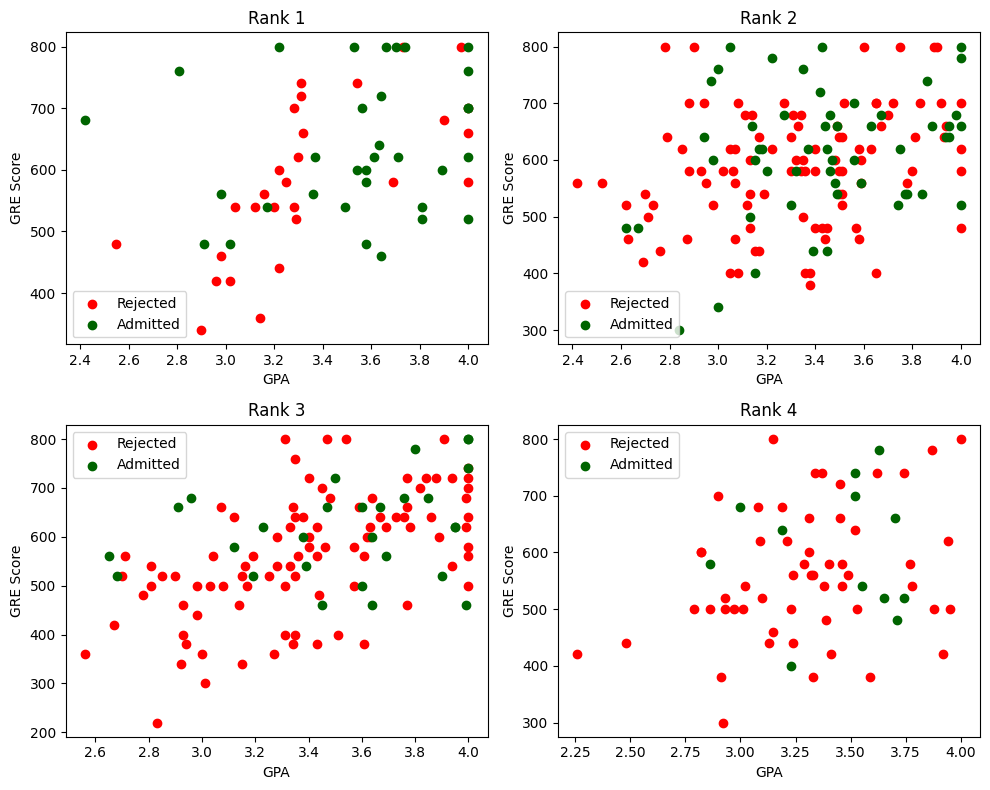

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through ranks 1 to 4
for rank in range(1, 5):
    # Filter the DataFrame for the current rank
    df_rank = df[df['rank'] == rank]

    # Scatter plot for admit = 0
    axs[(rank - 1) // 2, (rank - 1) % 2].scatter(
        df_rank[df_rank['admit'] == 0]['gpa'],
        df_rank[df_rank['admit'] == 0]['gre'],
        color='red',
        label='Rejected'
    )

    # Scatter plot for admit = 1
    axs[(rank - 1) // 2, (rank - 1) % 2].scatter(
        df_rank[df_rank['admit'] == 1]['gpa'],
        df_rank[df_rank['admit'] == 1]['gre'],
        color='darkgreen',
        label='Admitted'
    )

    # Set title and labels for the subplot
    axs[(rank - 1) // 2, (rank - 1) % 2].set_title(f'Rank {rank}')
    axs[(rank - 1) // 2, (rank - 1) % 2].set_xlabel('GPA')
    axs[(rank - 1) // 2, (rank - 1) % 2].set_ylabel('GRE Score')
    axs[(rank - 1) // 2, (rank - 1) % 2].legend()


plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from data_prep import features, targets, features_test, targets_test

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

def update_weights(weights, features, targets, learnrate):
    """
    Complete a single epoch of gradient descent and return updated weights
    """
    del_w = np.zeros(weights.shape)
    # Loop through all records, x is the input, y is the target
    for x, y in zip(features.values, targets):
        # TODO: Calculate the output of f(h) by passing h (the dot product
        # of x and weights) into the activation function (sigmoid).
        # Replace None with appropriate code
        output = None

        # TODO: Calculate the error by subtracting the network output
        # from the target (y).
        # Replace None with appropriate code
        error = None

        # TODO: Calculate the error term by multiplying the error by the
        # gradient. Recall that the gradient of the sigmoid f(h) is
        # f(h)*(1−f(h)) so you do not need to call any additional
        # functions and can simply apply this formula to the output and
        # error you already calculated.
        # Replace None with appropriate code
        error_term = None

        # TODO: Update the weight step by multiplying the error term by
        # the input (x) and adding this to the current weight step.
        # Replace 0 with appropriate code
        del_w += 0

    n_records = features.shape[0]
    # TODO: Update the weights by adding the learning rate times the
    # change in weights divided by the number of records.
    # Replace 0 with appropriate code
    weights += 0

    return weights

def gradient_descent(features, targets, epochs=1000, learnrate=0.5):
    """
    Perform the complete gradient descent process on a given dataset
    """
    # Use to same seed to make debugging easier
    np.random.seed(42)

    # Initialize loss and weights
    last_loss = None
    n_features = features.shape[1]
    weights = np.random.normal(scale=1/n_features**.5, size=n_features)

    # Repeatedly update the weights based on the number of epochs
    for e in range(epochs):
        weights = update_weights(weights, features, targets, learnrate)

        # Printing out the MSE on the training set every 10 epochs.
        # Initially this will print the same loss every time. When all of
        # the TODOs are complete, the MSE should decrease with each
        # printout
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss

    return weights

# Calculate accuracy on test data
weights = gradient_descent(features, targets)
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

In [ ]:
def update_weights(weights, features, targets, learnrate):
  """
  Complete a single epoch of gradient descent and return updated weights
  """
  del_w = np.zeros(weights.shape)
  # Loop through all records, x is the input, y is the target
  for x, y in zip(features.values, targets):
      # Calculate the output of f(h) by passing h (the dot product
      # of x and weights) into the activation function (sigmoid).
      output = sigmoid(np.dot(x, weights))

      # Calculate the error by subtracting the network output
      # from the target (y).
      error = y - output

      # Calculate the error term by multiplying the error by the
      # gradient. Recall that the gradient of the sigmoid f(h) is
      # f(h)*(1−f(h)) so you do not need to call any additional
      # functions and can simply apply this formula to the output and
      # error you already calculated.
      error_term = error  *output*  (1 - output)

      # Update the weight step by multiplying the error term by
      # the input (x) and adding this to the current weight step.
      del_w += error_term * x

  # Update the weights by adding the learning rate times the
  # change in weights divided by the number of records.
  n_records = features.shape[0]
  weights += learnrate * del_w / n_records

  return weights